In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [ ]:
# Summary of numeric columns
df.describe().T

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_report = pd.DataFrame(
    {'Missing_Count': missing, 'Missing_%': missing_pct})
missing_report[missing_report['Missing_%'] > 5]

,Missing_Count,Missing_%
Comments,525600,100.0


In [ ]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [ ]:
z_scores = np.abs(stats.zscore(df[cols].select_dtypes(
    include=[np.number]), nan_policy='omit'))
outliers = (z_scores > 3)
outlier_counts = outliers.sum(axis=0)
outlier_counts

array([ 305, 1062, 3415,  137,  206, 3510, 3915])

In [ ]:
# Replace extreme outliers with median
for c in cols:
    median = df[c].median()
    df.loc[np.abs(stats.zscore(df[c], nan_policy='omit')) > 3, c] = median

# Impute remaining missing values
df[cols] = df[cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
df.to_csv('../data/togo_clean.csv', index=False)

c:\Users\Administrator\Desktop\Projects\tenx\week0\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


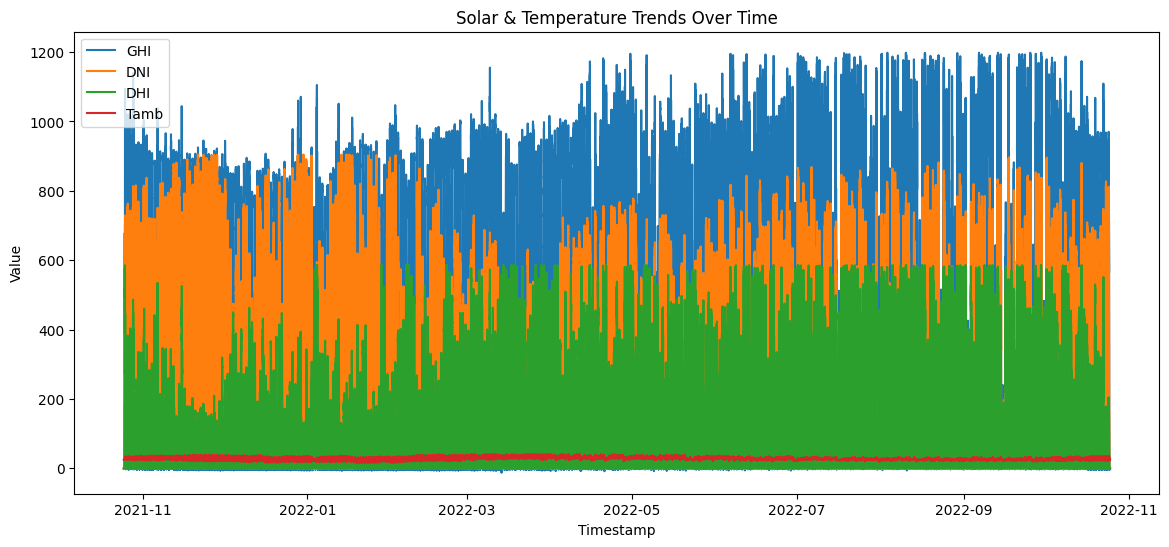

In [ ]:
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Solar & Temperature Trends Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.show()

<Axes: xlabel='month'>

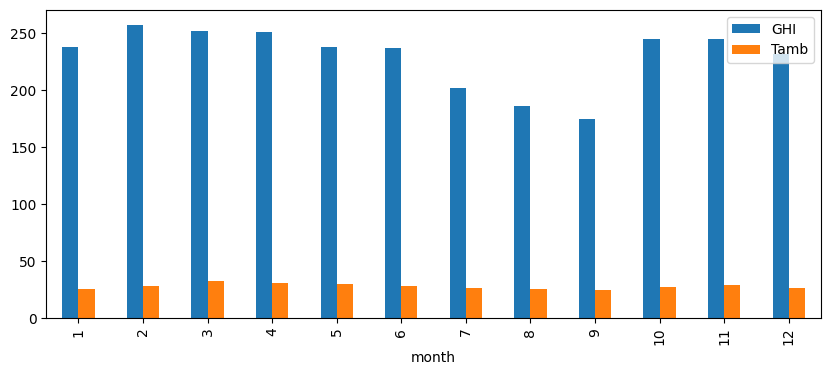

In [ ]:
df['month'] = df['Timestamp'].dt.month
df.groupby('month')[['GHI', 'Tamb']].mean().plot(kind='bar', figsize=(10, 4))

Text(0.5, 1.0, 'Effect of Cleaning on Module Performance')

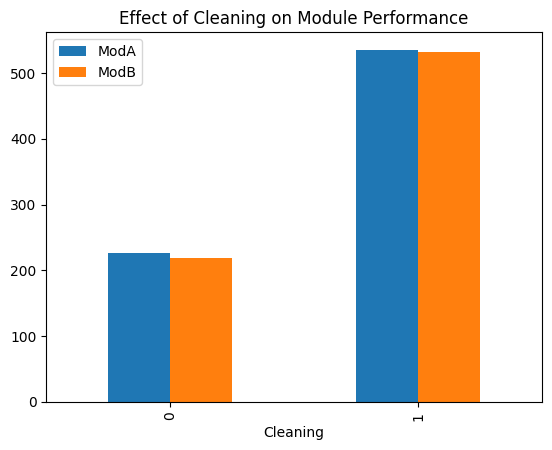

In [ ]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')

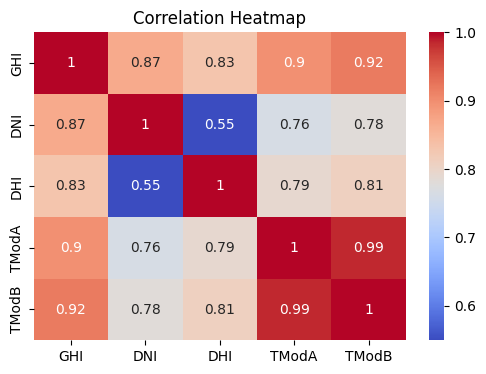

c:\Users\Administrator\Desktop\Projects\tenx\week0\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


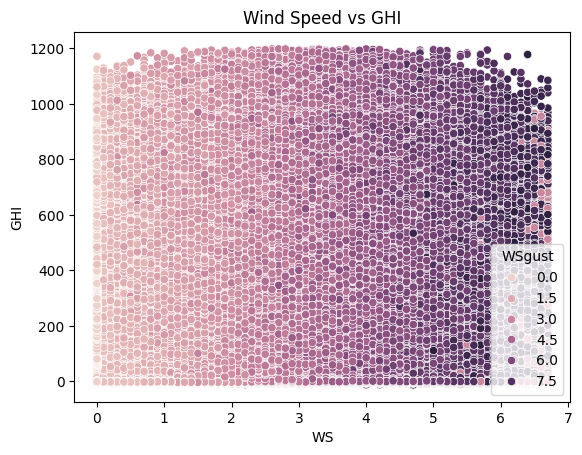

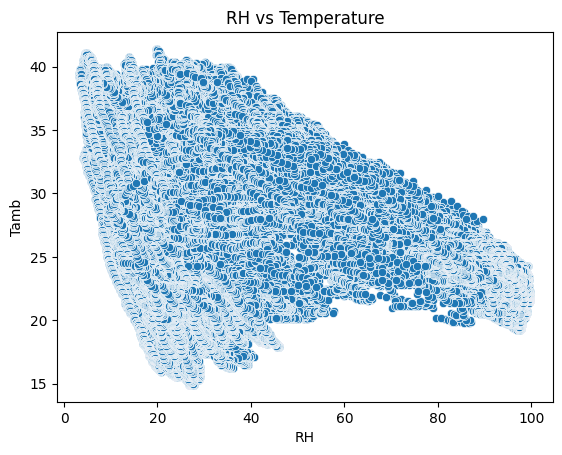

In [ ]:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='WS', y='GHI', hue='WSgust')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs Temperature")
plt.show()

Text(0.5, 1.0, 'Distribution of Wind Speed')

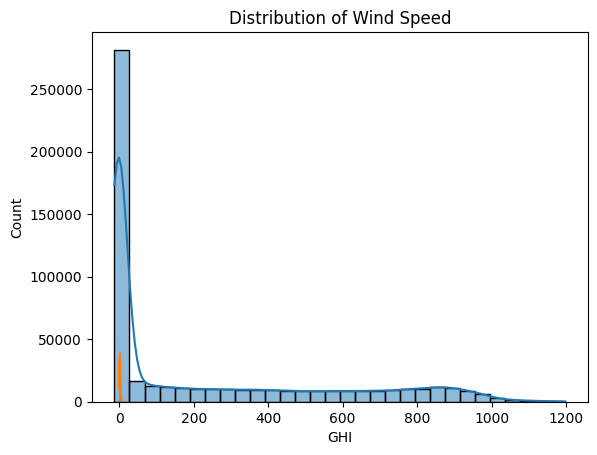

In [ ]:
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI")

sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed")

Text(0.5, 1.0, 'Humidity vs Temperature')

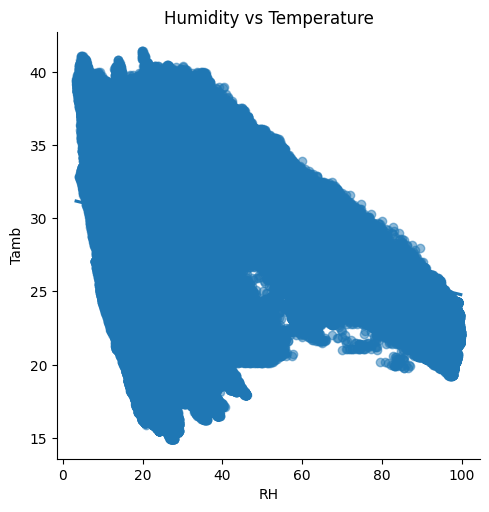

In [ ]:
sns.lmplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.5})
plt.title("Humidity vs Temperature")

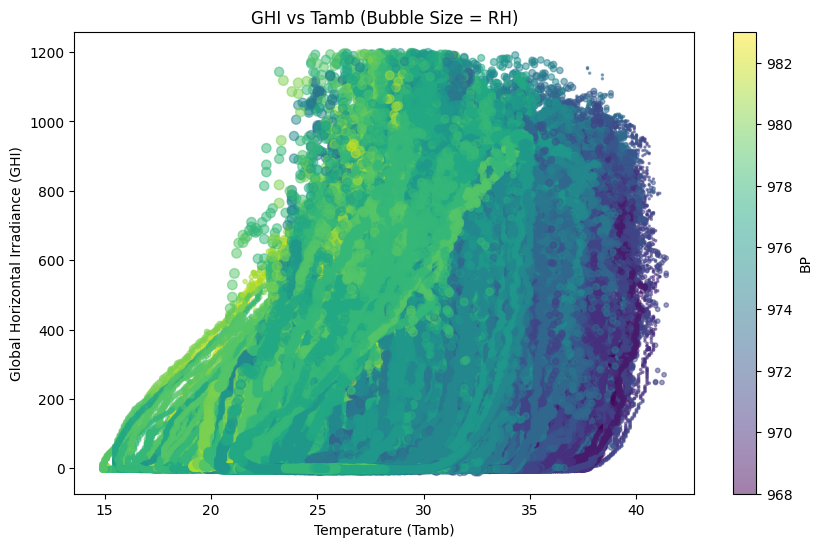

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*0.5,
            alpha=0.5, c=df['BP'], cmap='viridis')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.colorbar(label='BP')
plt.show()